# Import Library

In [3]:
# 📊 Data Manipulation & EDA
import pandas as pd
import numpy as np

# 📈 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 🧹 Warnings
import warnings
warnings.filterwarnings('ignore')

# ⚙️ Machine Learning: Baseline & Gradient Boosting
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    confusion_matrix, 
    classification_report, 
    roc_curve
)

# 📏 Score Scaling
from sklearn.preprocessing import MinMaxScaler

# 🔍 SHAP Explainability
import shap

# 📄 Save PNG & PDF
import matplotlib
from matplotlib import pyplot as plt

# Load Dataset

In [9]:
dataset = pd.read_csv("E:\Coding\PEFindo\data\credit_scoring.csv")

In [30]:
dataset.sample(5)

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
1431,502431,30,3031725,9225673,1,584,0,0,-0.004
3872,504872,43,5830344,7541151,0,847,0,0,-0.022
3779,504779,59,7628370,14466925,0,369,0,0,0.059
5496,506496,33,5597734,2571128,0,807,0,0,0.008
5106,506106,42,19640843,9021317,0,536,0,0,0.012


# Data Pre-Preparation

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   application_id     6000 non-null   int64  
 1   age                6000 non-null   int64  
 2   monthly_income     6000 non-null   int64  
 3   loan_amount        6000 non-null   int64  
 4   previous_defaults  6000 non-null   int64  
 5   credit_score       6000 non-null   int64  
 6   default            6000 non-null   int64  
 7   leak_col_good      6000 non-null   int64  
 8   leak_col_subtle    6000 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 422.0 KB


In [14]:
# Check for duplicate rows using len
has_duplicate_rows = len(dataset) != len(dataset.drop_duplicates())
print("Has duplicate rows:", has_duplicate_rows)

Has duplicate rows: False


Tidak ada Duplicate Rows

In [15]:
# Check if there are any nulls in the dataset
has_nulls = dataset.isnull().values.any()
print("Has missing values:", has_nulls)

Has missing values: False


Tidak ada Missing Value

In [16]:
dataset.describe()

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
count,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,503999.500000,40.321500,1.140386e+07,8.001122e+06,0.243667,575.979833,0.012167,0.012167,0.011945
std,1732.195139,11.300697,4.912598e+06,4.071786e+06,0.484767,158.328931,0.109639,0.109639,0.113947
min,501000.000000,21.000000,3.000310e+06,1.000794e+06,0.000000,300.000000,0.000000,0.000000,-0.119000
25%,502499.750000,31.000000,7.163379e+06,4.440939e+06,0.000000,438.750000,0.000000,0.000000,-0.020000
50%,503999.500000,41.000000,1.129945e+07,7.982304e+06,0.000000,577.500000,0.000000,0.000000,0.000000
75%,505499.250000,50.000000,1.573705e+07,1.153144e+07,0.000000,713.000000,0.000000,0.000000,0.021000
max,506999.000000,59.000000,1.998622e+07,1.499858e+07,3.000000,849.000000,1.000000,1.000000,1.092000


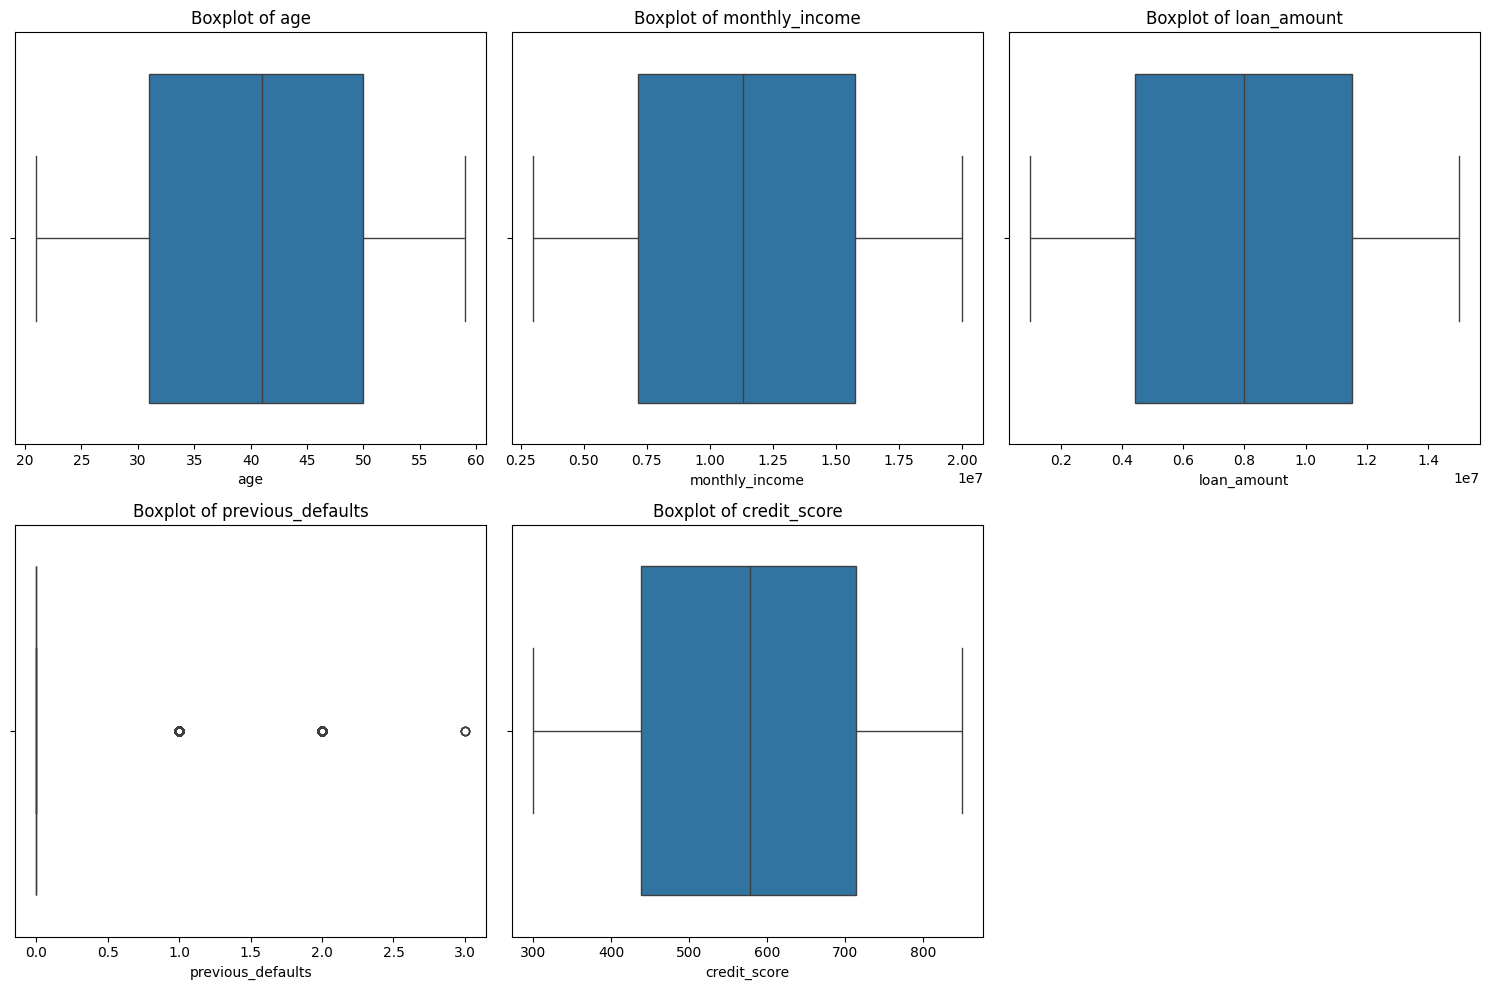

In [18]:
numeric_cols = ['age', 'monthly_income', 'loan_amount', 'previous_defaults', 'credit_score']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Karena tidak terlihat adanya Extreme Outlier, maka tidak dilakukan Outlier Handling.

In [31]:
# Karena Data Leakage (Fitur yang membocorkan hasil target) dapat terjadi oleh kedua fitur ini, kita drop kedua fitur tersebut.

df = dataset.drop(['leak_col_good', 'leak_col_subtle'], axis=1)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   application_id     6000 non-null   int64
 1   age                6000 non-null   int64
 2   monthly_income     6000 non-null   int64
 3   loan_amount        6000 non-null   int64
 4   previous_defaults  6000 non-null   int64
 5   credit_score       6000 non-null   int64
 6   default            6000 non-null   int64
dtypes: int64(7)
memory usage: 328.3 KB


# Exploratory Data Analysis

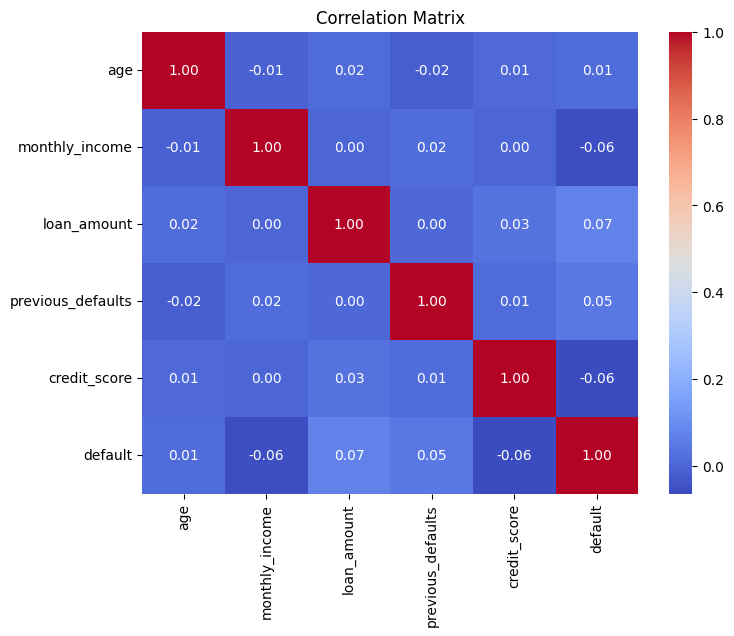

In [36]:

corr = df.drop('application_id', axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


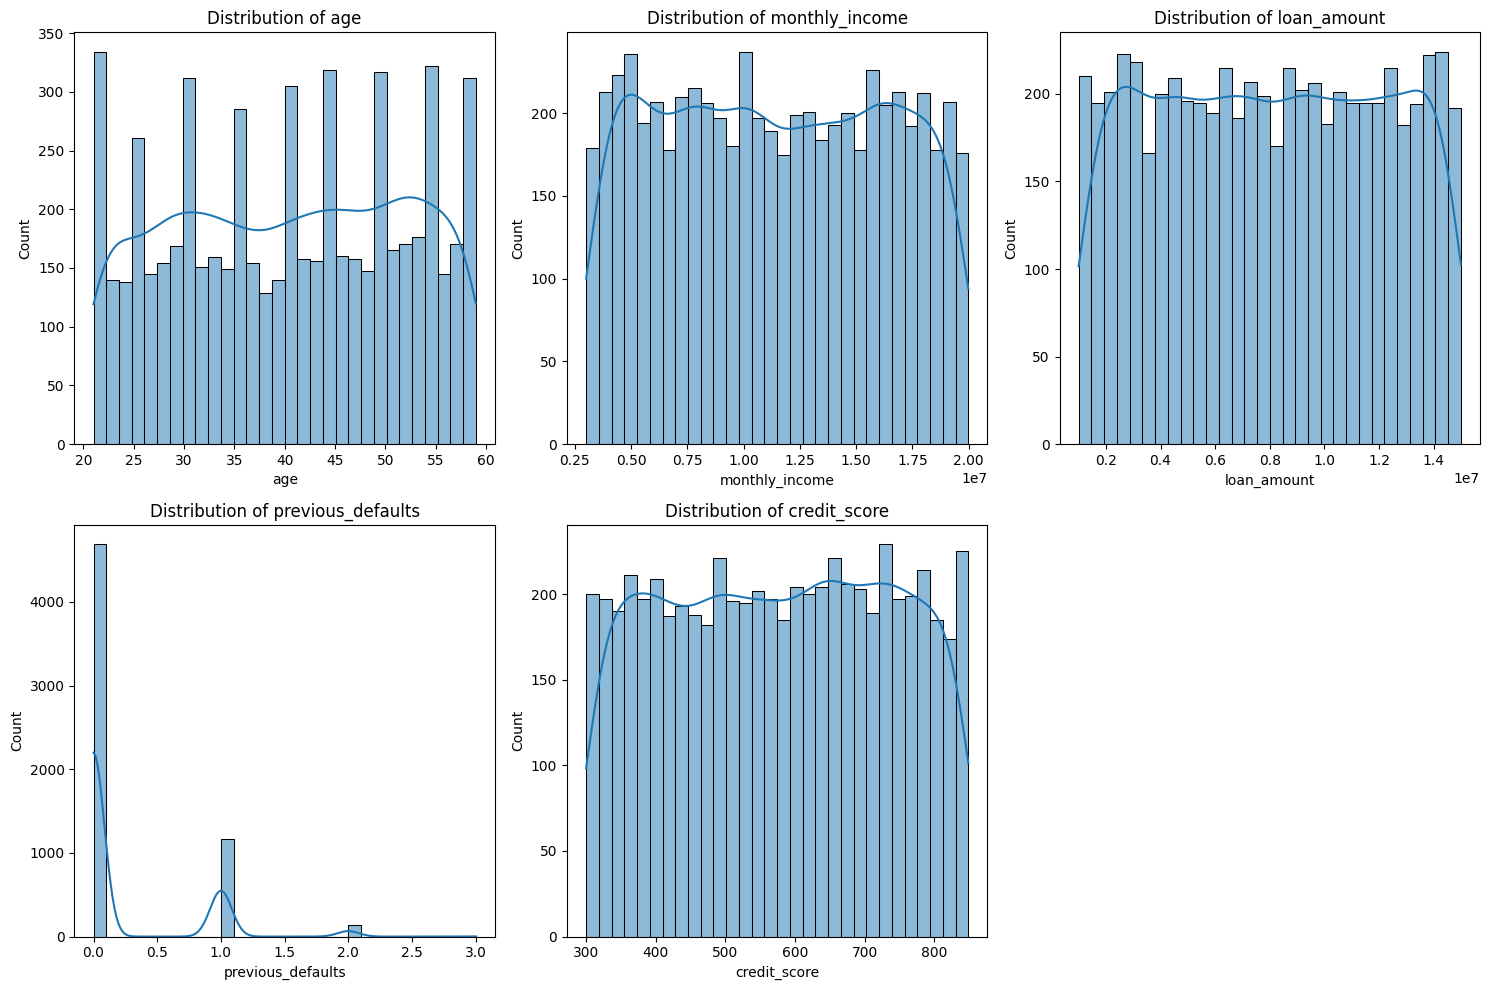

In [34]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


default
0    5927
1      73
Name: count, dtype: int64


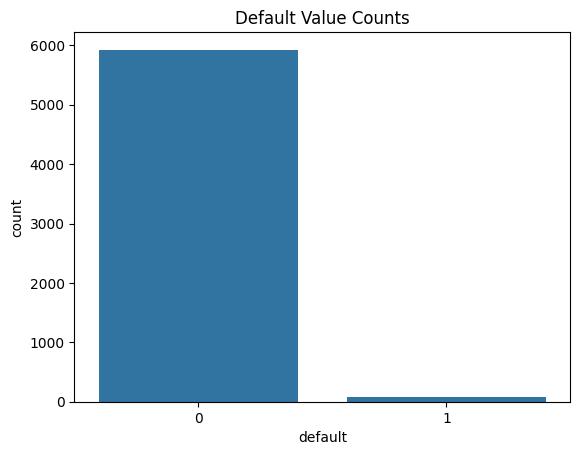

In [40]:
# Value counts
print(df['default'].value_counts())

# Plot
sns.countplot(x='default', data=df)
plt.title('Default Value Counts')
plt.show()

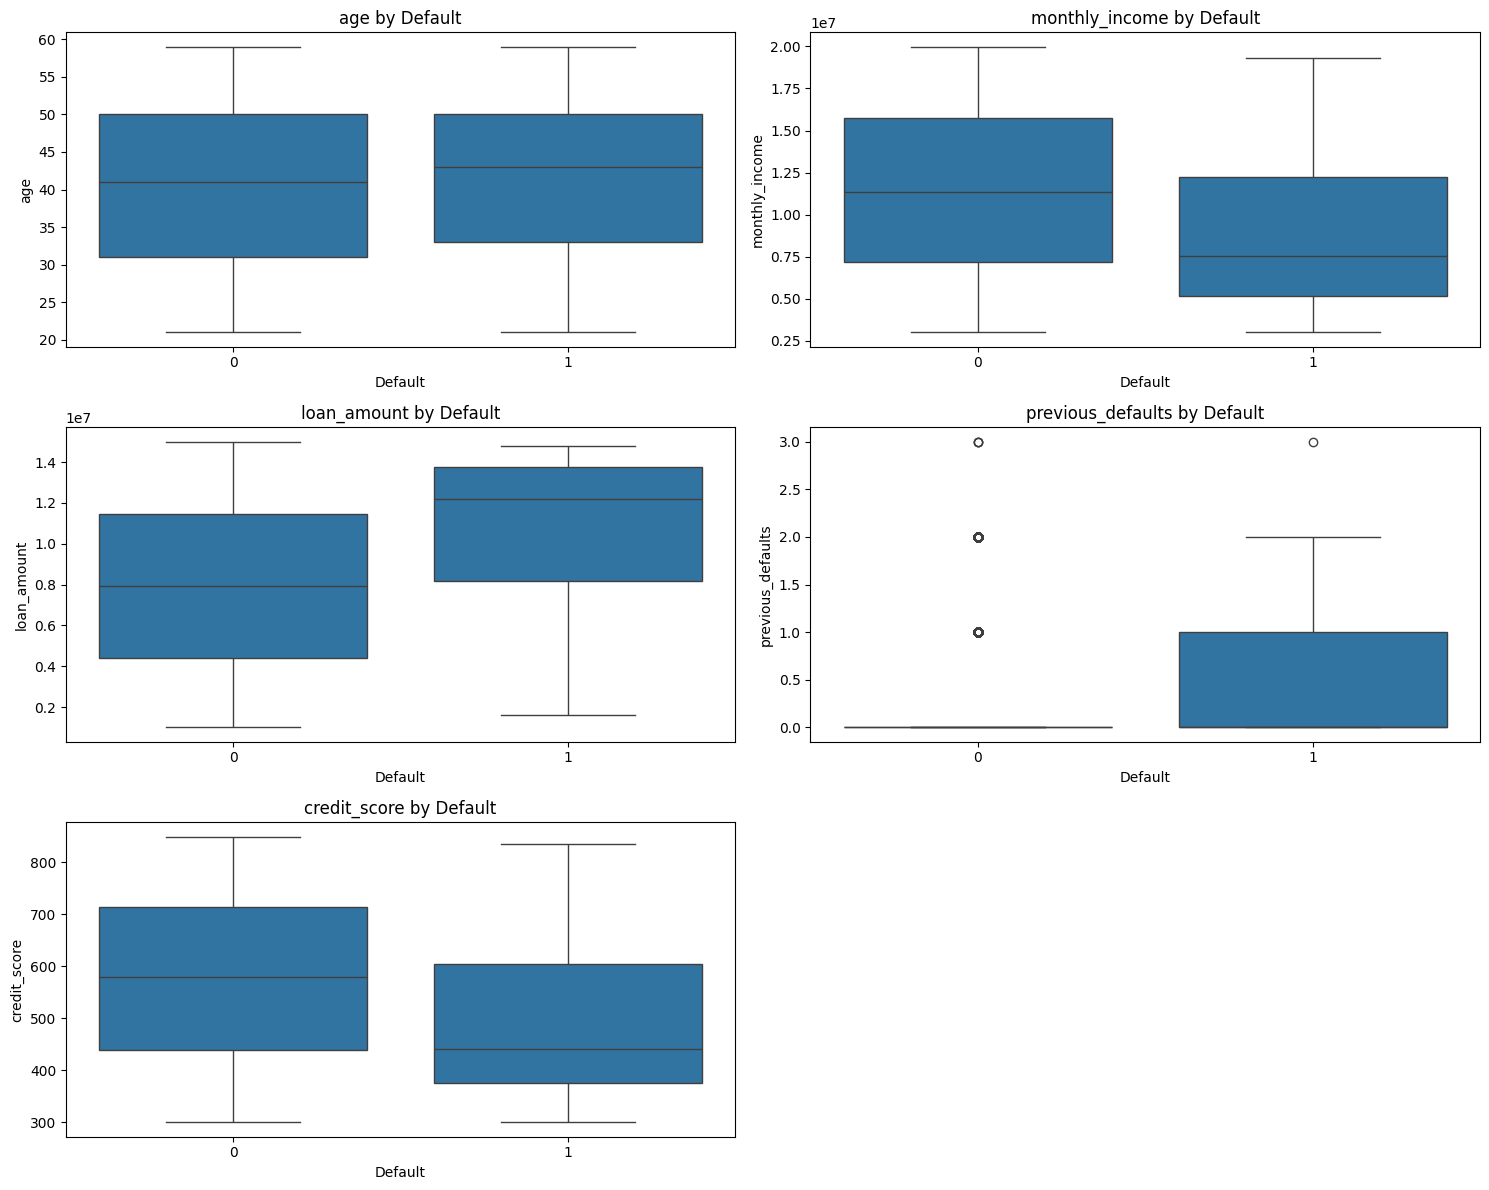

In [37]:

numeric_cols = ['age', 'monthly_income', 'loan_amount', 'previous_defaults', 'credit_score']

plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='default', y=col, data=df)
    plt.title(f'{col} by Default')
    plt.xlabel('Default')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [ ]:
# Drop ID Karena tidak digunakan dalam Modeling
df = df.drop(["application_id"], axis=1)

# Modeling

In [44]:
df.head()

,age,monthly_income,loan_amount,previous_defaults,credit_score,default
0,41,13995609,5982664,0,624,0
1,58,13683833,3711198,0,809,0
2,33,9417391,7172332,0,647,0
3,45,6861811,8661056,0,450,0
4,22,5640742,4520669,1,816,0


In [45]:
# Drop NaN values from both X and y simultaneously
df_ready = df.dropna(subset=['default'])  # Drop rows with NaN in the target column
X = df_ready.drop(['default'], axis=1)         # Drop the 'default' column from the dataset to get features
y = df_ready['default']                        # Extract 'default' as the target variable

# Now, X and y should have the same number of samples
print(X.shape)
print(y.shape)


(6000, 5)
(6000,)


In [46]:
from sklearn.model_selection import train_test_split
# First, split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
X_train.head()

,age,monthly_income,loan_amount,previous_defaults,credit_score
3897,40,11472284,8369155,0,321
5628,40,15284117,12791450,1,821
1756,34,15453846,13234338,0,705
2346,37,5810685,7980815,0,737
2996,44,19968298,4921501,0,374


## Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

# 1. numeric columns
numeric_cols = ['age', 'monthly_income', 'loan_amount', 'credit_score']
# 'previous_defaults' can be left as is

# 2. Initialize the scaler
scaler = StandardScaler()

# 3. Fit on training data, transform both train and test
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scale only numeric columns
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [50]:
X_train_scaled.head()

,age,monthly_income,loan_amount,previous_defaults,credit_score
3897,-0.024122,0.002349,0.096759,0,-1.612533
5628,-0.024122,0.779207,1.184729,1,1.556458
1756,-0.554837,0.813798,1.293688,0,0.821252
2346,-0.289479,-1.151493,0.001220,0,1.024067
2996,0.329689,1.733850,-0.751430,0,-1.276620
